In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [53]:
df = pd.read_csv(r"/content/drive/MyDrive/tech-data/oct-batch-2022/ml/pca/car-mpg.csv")

In [54]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [55]:
df.shape

(398, 10)

this data contain 398 rows and 10 columns

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


1. observation 
all the data types of columns looks fine except hp columns ,
according my observation it should be int but it is object so i need to check it 

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [58]:
df.car_name.value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car_name, Length: 305, dtype: int64

In [59]:
len(df.car_name.unique())

305

In [60]:
df.cyl.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [61]:
df[df["cyl"]==4].groupby('origin')[["mpg", "disp"]].mean()

,mpg,disp
origin,,
1,27.840278,124.284722
2,28.411111,104.222222
3,31.595652,99.768116


In [62]:
df.groupby(['cyl'])['mpg'].mean().reset_index()

,cyl,mpg
0,3,20.550000
1,4,29.286765
2,5,27.366667
3,6,19.985714
4,8,14.963107


In [63]:
df.hp.value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: hp, Length: 94, dtype: int64

In [64]:
temp = df.hp.str.isdigit()

In [65]:
ind = temp[temp==False].index

In [66]:
ind

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [67]:
df.iloc[ind, :]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,0,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,1,amc concord dl


In [68]:
df['hp'] = df['hp'].replace('?', np.nan)

In [69]:
df.hp.isna().sum()

6

In [ ]:
df['hp'] = pd.to_numeric(df['hp'])

In [71]:
df['hp'] = df['hp'].fillna(df['hp'].median())

In [72]:
df.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


In [77]:
X = df[df.columns[1:-1]]
y = df[df.columns[0]]

In [78]:
X.head()

,cyl,disp,hp,wt,acc,yr,origin,car_type
0,8,307.0,130.0,3504,12.0,70,1,0
1,8,350.0,165.0,3693,11.5,70,1,0
2,8,318.0,150.0,3436,11.0,70,1,0
3,8,304.0,150.0,3433,12.0,70,1,0
4,8,302.0,140.0,3449,10.5,70,1,0


In [79]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [80]:
sc = StandardScaler()

In [81]:
scaled_x = sc.fit_transform(X)

In [82]:
scaled_x

array([[ 1.49819126,  1.0906037 ,  0.67311762, ..., -1.62742629,
        -0.71514478, -1.06223455],
       [ 1.49819126,  1.5035143 ,  1.58995818, ..., -1.62742629,
        -0.71514478, -1.06223455],
       [ 1.49819126,  1.19623199,  1.19702651, ..., -1.62742629,
        -0.71514478, -1.06223455],
       ...,
       [-0.85632057, -0.56103873, -0.53187283, ...,  1.62198339,
        -0.71514478,  0.94141167],
       [-0.85632057, -0.70507731, -0.66285006, ...,  1.62198339,
        -0.71514478,  0.94141167],
       [-0.85632057, -0.71467988, -0.58426372, ...,  1.62198339,
        -0.71514478,  0.94141167]])

In [83]:
cov_matrix = np.cov(scaled_x.T)

In [84]:
cov_matrix

array([[ 1.00251889,  0.95311615,  0.84340357,  0.89827376, -0.50669259,
        -0.34962425, -0.56396033, -0.9148753 ],
       [ 0.95311615,  1.00251889,  0.89803457,  0.93517383, -0.54505356,
        -0.37109656, -0.61094444, -0.85729492],
       [ 0.84340357,  0.89803457,  1.00251889,  0.86461476, -0.68831918,
        -0.41477495, -0.45323458, -0.70316554],
       [ 0.89827376,  0.93517383,  0.86461476,  1.00251889, -0.41850885,
        -0.30733654, -0.58248745, -0.81749949],
       [-0.50669259, -0.54505356, -0.68831918, -0.41850885,  1.00251889,
         0.28886274,  0.20639158,  0.386157  ],
       [-0.34962425, -0.37109656, -0.41477495, -0.30733654,  0.28886274,
         1.00251889,  0.18111726,  0.30596228],
       [-0.56396033, -0.61094444, -0.45323458, -0.58248745,  0.20639158,
         0.18111726,  1.00251889,  0.574134  ],
       [-0.9148753 , -0.85729492, -0.70316554, -0.81749949,  0.386157  ,
         0.30596228,  0.574134  ,  1.00251889]])

In [85]:
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)

In [88]:
print(f"eigen vector of data \n \n {eigen_vec} \n \n eigen values of corresponding vector\n \n {eigen_val}")

eigen vector of data 
 
 [[ 0.41449162  0.09356606 -0.0332179   0.22483956 -0.21450742 -0.60220965
   0.59880399  0.0234461 ]
 [ 0.42235576  0.06187586 -0.04032618  0.09684791  0.12835736  0.74797026
   0.45110563  0.16537793]
 [ 0.39744365 -0.20172205 -0.18376472  0.04303365  0.46457979 -0.06040034
  -0.13581577 -0.72649631]
 [ 0.40260479  0.15741564 -0.01696792  0.22498319  0.43399861 -0.19756493
  -0.45435481  0.57306139]
 [-0.26221017  0.5441256   0.53541792  0.45190768  0.2699598   0.02758899
   0.09073241 -0.24981681]
 [-0.19124988  0.60549598 -0.7689377   0.01510864  0.02758254  0.01418304
   0.01608912 -0.06390489]
 [-0.27875834 -0.46273794 -0.28487647  0.78545989 -0.03829693  0.06746746
   0.00618601  0.0633148 ]
 [-0.38304481 -0.21241671 -0.06419381 -0.25729801  0.67691656 -0.17230715
   0.45224306  0.21308012]] 
 
 eigen values of corresponding vector
 
 [5.36154846 0.98268568 0.75355216 0.50823437 0.25713278 0.03085396
 0.06471669 0.06142704]


In [90]:
for i in sorted(eigen_val, reverse=True)

[5.3615484572532734,
 0.9826856840544212,
 0.7535521581523291,
 0.5082343727181986,
 0.2571327768264764,
 0.0647166863738924,
 0.06142703522877066,
 0.030853962893905382]

In [93]:
0.9826856840544212 / sum(eigen_val) * 100

12.252707806834323

In [94]:
tot = sum(eigen_val)
var_exp = [( i /tot ) * 100 for i in sorted(eigen_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp) 

Cumulative Variance Explained [ 66.85096537  79.10367318  88.49940832  94.83637584  98.04245978
  98.8493858   99.6152945  100.        ]


In [98]:
5.3615484572532734 / sum(eigen_val) * 100, 0.9826856840544212 / sum(eigen_val) * 100, 0.7535521581523291 / sum(eigen_val) * 100, 0.5082343727181986/sum(eigen_val) * 100

(66.85096537467172, 12.252707806834323, 9.395735137766154, 6.3369675241559245)

In [96]:
eigen_val.size

8

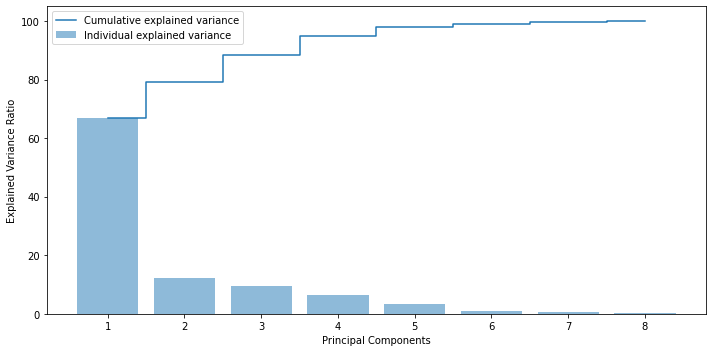

In [95]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigen_val.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigen_val.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [99]:
X_reduced = pd.DataFrame(PCA(n_components=5).fit_transform(X))
cov_matrix = np.cov(X_reduced.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 7.27715750e+05 -7.77079604e-12 -1.46618793e-13 -4.03201681e-13
   0.00000000e+00]
 [-7.77079604e-12  1.50733309e+03  6.41457220e-14  4.58183729e-15
  -6.87275593e-15]
 [-1.46618793e-13  6.41457220e-14  2.61410104e+02  2.18353183e-15
   4.58183729e-15]
 [-4.03201681e-13  4.58183729e-15  2.18353183e-15  1.10653093e+01
   2.42599112e-15]
 [ 0.00000000e+00 -6.87275593e-15  4.58183729e-15  2.42599112e-15
   2.95793432e+00]]


In [100]:
X_reduced

,0,1,2,3,4
0,543.666024,51.032596,-10.798214,4.370674,-2.152889
1,737.553887,79.377066,8.969671,2.718823,0.201512
2,478.195525,75.647234,5.056796,3.250463,-1.120398
3,473.616469,62.736321,9.241555,3.449817,-0.269126
4,488.885875,55.978671,0.440506,3.828854,-2.680760
...,...,...,...,...,...
393,-185.929814,-34.397427,-0.984581,-4.934510,-1.189517
394,-847.349224,-5.937590,-19.411099,-3.570826,6.450758
395,-677.955907,20.113263,0.012507,-5.807743,-3.857800
396,-352.284360,-35.605911,-1.417256,-4.516223,1.494193


In [101]:
X.shape

(398, 8)

In [102]:
y.shape

(398,)

In [104]:
pd.concat([X_reduced,y],axis =1 )

,0,1,2,3,4,mpg
0,543.666024,51.032596,-10.798214,4.370674,-2.152889,18.0
1,737.553887,79.377066,8.969671,2.718823,0.201512,15.0
2,478.195525,75.647234,5.056796,3.250463,-1.120398,18.0
3,473.616469,62.736321,9.241555,3.449817,-0.269126,16.0
4,488.885875,55.978671,0.440506,3.828854,-2.680760,17.0
...,...,...,...,...,...,...
393,-185.929814,-34.397427,-0.984581,-4.934510,-1.189517,27.0
394,-847.349224,-5.937590,-19.411099,-3.570826,6.450758,44.0
395,-677.955907,20.113263,0.012507,-5.807743,-3.857800,32.0
396,-352.284360,-35.605911,-1.417256,-4.516223,1.494193,28.0
